# Project Title:
Online Education Platform Analysis 

# Pandas Tasks: 
- Load and clean course activity dataset 
- Analyze engagement trends over time 
- Calculate course completion percentages per student 
- Segment students by activity levels 
- Determine correlation between engagement and scores 
- Visualize top-performing courses by completion rate 
- Detect patterns in assignment submissions and dropouts 
- Identify most popular courses by demographics

# Task 1 :
Load and clean course activity dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("online_course_engagement_data cleaned.csv")
df.head()

,Student ID,Course Category,Time Spent (Hours),Videos Watched,Quizzes Taken,Quiz Score,Engagement Index,Engagement Level,Completion Rate (%),Course Completion,Completion Flag,Student Status
0,7050,Programming,45,5,8,76.9412,43.354584,Medium,43.35,Not Completed,0,At Risk
1,8491,Programming,38,17,8,63.1374,52.245188,Medium,52.25,Not Completed,0,At Risk
2,967,Programming,30,17,8,90.0641,47.750035,Medium,47.75,Not Completed,0,At Risk
3,5682,Programming,34,20,8,50.5670,53.043657,Medium,53.04,Not Completed,0,At Risk
4,849,Programming,84,16,8,53.6559,74.169531,Medium,74.17,Not Completed,0,At Risk


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student ID           9000 non-null   int64  
 1   Course Category      9000 non-null   object 
 2   Time Spent (Hours)   9000 non-null   int64  
 3   Videos Watched       9000 non-null   int64  
 4   Quizzes Taken        9000 non-null   int64  
 5   Quiz Score           9000 non-null   float64
 6   Engagement Index     9000 non-null   float64
 7   Engagement Level     9000 non-null   object 
 8   Completion Rate (%)  9000 non-null   float64
 9   Course Completion    9000 non-null   object 
 10  Completion Flag      9000 non-null   int64  
 11  Student Status       9000 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 843.9+ KB


In [4]:
df = df.drop_duplicates()

# Task 2 :
Analyze engagement trends over time

In [5]:
df['Engagement Level'].value_counts()

Engagement Level
Medium    4889
Low       3145
High        89
Name: count, dtype: int64

# Task 3 :
Calculate course completion percentages per student

In [6]:
df['Course Completion'].value_counts()


Course Completion
Not Completed    7845
Completed         278
Name: count, dtype: int64

In [7]:
df['Completion Flag'] = df['Course Completion'].apply(
    lambda x: 1 if x.lower().strip() == 'completed' else 0
)


In [8]:
df['Completion Flag'].value_counts()


Completion Flag
0    7845
1     278
Name: count, dtype: int64

In [9]:
completion_per_student = df.groupby('Student ID')['Completion Flag'] \
    .mean() * 100

completion_per_student = completion_per_student.reset_index(
    name='Completion Percentage'
)

completion_per_student.head()


,Student ID,Completion Percentage
0,1,0.0
1,3,0.0
2,4,100.0
3,5,0.0
4,6,0.0


# Task 4 :
Segment students by activity levels

In [10]:
df.groupby('Engagement Level')['Completion Flag'].mean() * 100


Engagement Level
High      100.000000
Low         0.000000
Medium      3.865821
Name: Completion Flag, dtype: float64

# Task 5 :
Determine correlation between engagement and scores

In [11]:
df[['Engagement Index', 'Quiz Score']].corr()


,Engagement Index,Quiz Score
Engagement Index,1.00000,-0.00438
Quiz Score,-0.00438,1.00000


#  Task 6 :
Visualize top-performing courses by completion rate

In [12]:
course_completion = df.groupby('Course Category')['Completion Flag'] \
    .mean() * 100

course_completion = course_completion.sort_values(ascending=False)
course_completion


Course Category
Programming    3.796693
Business       3.439952
Health         3.427173
Arts           3.375796
Science        3.069368
Name: Completion Flag, dtype: float64

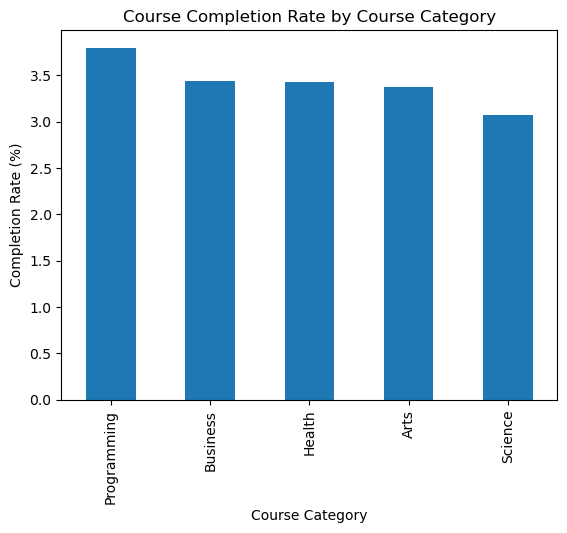

In [13]:
import matplotlib.pyplot as plt

course_completion.plot(kind='bar')
plt.title("Course Completion Rate by Course Category")
plt.ylabel("Completion Rate (%)")
plt.show()


# Task 7 :
Detect patterns in assignment submissions and dropouts

In [14]:
df.groupby('Student Status')['Completion Rate (%)'].mean()


Student Status
Active Learner    78.994065
At Risk           55.274928
Dropout Risk      28.669590
Name: Completion Rate (%), dtype: float64

In [15]:
df.groupby('Student Status')[[
    'Engagement Index',
    'Completion Rate (%)',
    'Quiz Score'
]].mean()

,Engagement Index,Completion Rate (%),Quiz Score
Student Status,,,
Active Learner,78.994037,78.994065,74.947853
At Risk,55.274913,55.274928,75.096948
Dropout Risk,28.669588,28.669590,75.094983


In [16]:
df.groupby('Engagement Level')[[
    'Time Spent (Hours)',
    'Videos Watched',
    'Quizzes Taken'
]].mean()

,Time Spent (Hours),Videos Watched,Quizzes Taken
Engagement Level,,,
High,94.595506,17.348315,9.044944
Low,24.391733,8.155485,4.158983
Medium,66.668439,11.298834,5.744733


# Task 8 :
Identify most popular courses by demographics

In [17]:
df['Course Category'].value_counts()

Course Category
Business       1657
Health         1634
Programming    1633
Science        1629
Arts           1570
Name: count, dtype: int64

In [18]:
df.groupby('Engagement Level')['Quiz Score'].mean()

Engagement Level
High      74.354510
Low       75.094983
Medium    75.101985
Name: Quiz Score, dtype: float64

In [21]:
df.to_csv("final_online_education_dataset.csv", index=False)
